# UTSA CS 5233: Assignment-4

**Oguibe Godsalvation - jlz446**

## Learning Objectives

*   Deep Learning
*   Computer Vision - Convolutional Neural Network
*   Natrual Language Processing - Recurrent Neural Network


## General Information

The base structure and comments are provided on what should be done. You are free to use any code from online sources, but please cite the source properly. Also, you are supposed to create/train the DL model and not use pre-trained models.

**TIPS** while working on this assignment:


*   You will have to keep on updating the model to improve accuracy. Hence, all except the first step (loading the data) would be repeated multiple times. i.e. repeat -- model creation, training & testing.
*   Training a Deep Learning model on real-world datasets and obtain decent accuracy is time consuming. For this assignment, it may take at least 40-60 min, if not more, to train the complete data. Hence, have enough time planned out for finishing the assignment.
*   Please refer to the [TensorFlow Keras API](https://www.tensorflow.org/api_docs/python/tf/keras) for selecting the *'activation function', 'loss', 'optimizer' & 'metrics'*. At least use 'accuracy' as one of the 'metrics'.




## Import Libraries

Write all the import statements here.

In [181]:
# import all required libraries
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar100
from numpy.random import default_rng
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np


# Computer Vision - CNN

The goal of this task is to get hands-on experience in developing, training and testing **Convolutional Neural Network** for the Computer Vision task of Object/Image Classification.

## Load/Prepare Data

(10 points + 10 extra credits)

In this assignment, will work with the well-known **CIFAR-100 dataset**. The dataset consists of 60000 32x32 color images, which belong to 100 classes, with 600 images per class. There are 50000 training images (500 per class) and 10000 test images (100 per class). The 100 classes in the dataset are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs). More information about the dataset can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html). Please visit this [website](https://benchmarks.ai/cifar-100) for the benchmark performances of different techniques on the CIFAR-100 dataset.

In this section, you will write code for the following: 

*   (10 points) Load the CIFAR-100 dataset and prepare the data to be used for the DL model creation and training
*   (10 extra credits) Visualize the data by plotting 100 random images, one each for the 100 classes



In [162]:
# The data from TensforFlow and Keras will only have integer class labels. Each of those 100 integer class labels correspond to the following names, in the correct order
fine_labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

# These are the string labels for the 20 superclasses. You may not need to use this at all, just provided here for reference.
coarse_labels = ['aquatic_mammals', 'fish', 'flowers', 'food_containers', 'fruit_and_vegetables', 'household_electrical_devices', 'household_furniture', 'insects', 'large_carnivores', 'large_man-made_outdoor_things', 'large_natural_outdoor_scenes', 'large_omnivores_and_herbivores', 'medium_mammals', 'non-insect_invertebrates', 'people', 'reptiles', 'small_mammals', 'trees', 'vehicles_1', 'vehicles_2']


In [163]:
import sys
print('python:{}'.format(sys.version))
print('keras:{}'.format(keras.__version__))

python:3.7.15 (default, Oct 12 2022, 19:14:55) 
[GCC 7.5.0]
keras:2.9.0


In [164]:
# Load the data - training as well as testing
(X_train, y_train),(X_test, y_test)= cifar100.load_data()

169001437/169001437 [==============================] - 13s 0us/step


In [165]:
print('Train Images: {}'.format(X_train.shape))
print('test Images: {}'.format(X_test.shape))



Train Images: (50000, 32, 32, 3)
test Images: (10000, 32, 32, 3)


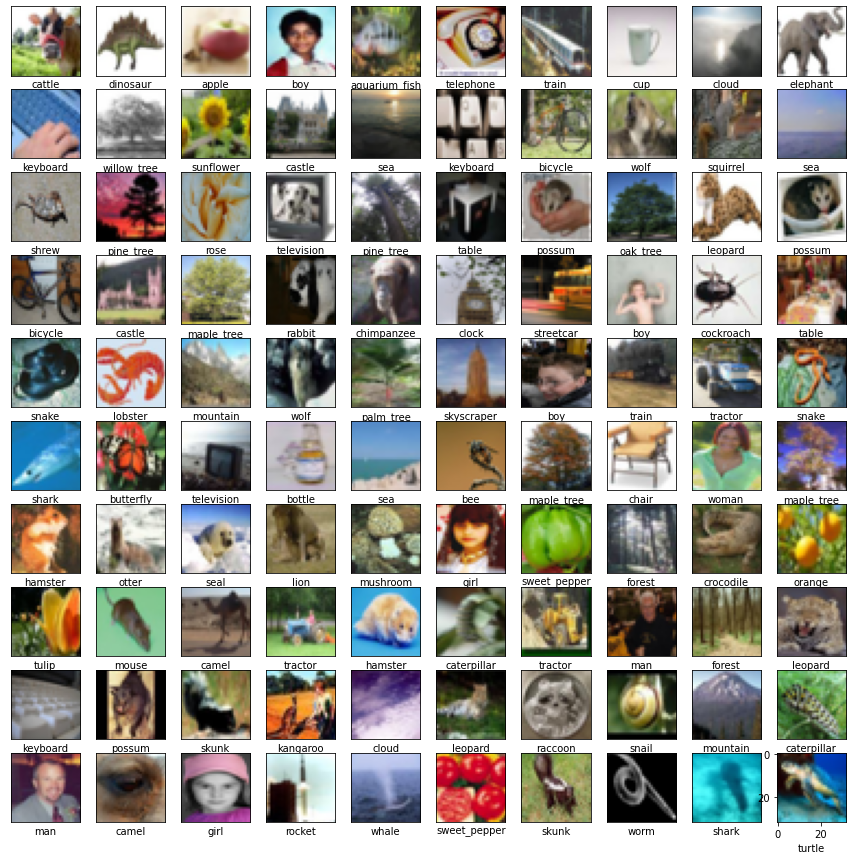

In [166]:
# Visualize the data by plotting 100 random images, one each for the 100 classes
# Draw 10 images in one row, 10 rows total
fine_labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']
img= plt.figure(figsize = (15,15))
for i in range (100):
  plt.xticks([]) #removes the labels
  plt.yticks([])
  img =plt.subplot(10,10,i+1)
  img=plt.imshow(X_train[i])
  plt.xlabel(fine_labels[y_train[i][0]])

plt.show(img)

In [167]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 100)
y_test = tf.keras.utils.to_categorical(y_test, 100)
print (X_train[0])

[[[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.7647059  0.8039216  0.75686276]
  [0.83137256 0.8784314  0.8       ]
  [0.7137255  0.7607843  0.654902  ]]

 [[1.         1.         1.        ]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  ...
  [0.6666667  0.6901961  0.5882353 ]
  [0.6313726  0.65882355 0.50980395]
  [0.57254905 0.6039216  0.44313726]]

 [[1.         1.         1.        ]
  [0.99607843 0.99607843 0.99607843]
  [1.         1.         1.        ]
  ...
  [0.7411765  0.78039217 0.6627451 ]
  [0.6509804  0.69803923 0.50980395]
  [0.4745098  0.52156866 0.34117648]]

 ...

 [[0.5803922  0.7254902  0.30980393]
  [0.5568628  0.7137255  0.22352941]
  [0.54901963 0.7019608  0.23529412]
  ...
  [0.11764706 0.06666667 0.00392157]
  [0.25490198 0.24313726 0.05882353]
  [0.29803923 0.3019608  0.07843138]]

 [[0.47843137 0.6156863  0.25882354]
  [0.47058824 0.60784316 0.22745098]


## CNN Model Creation

(25 points)

In this section, you will write code for the following:

*   (10 points) Create a DL model for Computer Vision - must have Convolutional Neural Network (CNN) layers (Use *TensorFlow* and *keras*, as shown in the example code in the lecture for 'deep-learning'). Print the DL model summary.
*   (15 points) Points will be deducted if the model overfits, i.e., the accuracy/loss curves (plotted in the next section) for training and validation must be very similar. Overfitting occurs if the training graph keeps improving and the validation graph stays constant or it degrades.

In [168]:
# Create a DL model for Computer Vision - Convolutional Neural Network (Use *TensorFlow* and *keras*, as shown in the example code in the lecture for 'deep-learning')
from keras import datasets, Sequential
from keras.layers import Dense
from keras.layers import *

model = keras.Sequential()
model.add(Conv2D(32,(3,3),padding='same', activation= 'relu', input_shape=(32,32,3)))
model.add(Conv2D(32,(3,3),padding='same', activation ='relu'))
#model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64,(3,3),padding='same', activation= 'relu'))
model.add(Conv2D(64,(3,3),padding='same', activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(100,activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [169]:
summary= model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

In [170]:
# Print the DL model summary


## Training

(10 points)

In this section, you will write code to do the following:

*   (05 points) Train/fit the DL model using the CIFAR-100 data
 *  Validation split should be 20%
*   (05 points) Plot two graphs
 *  Graph-1 will have two plots for accuracy - training accuracy and validation accuracy
 *  Graph-2 will have two plots for loss - training loss and validation loss


In [171]:
# Train/fit the DL model using the training CIFAR-100 data

#cp_callback = tf.keras.callbacks.ModelCheckpoint(X_train, y_train, save_weights_only=True,verbose=1)
#history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

output = model.fit(X_train, y_train, validation_split=0.2, batch_size=128, epochs=100, verbose=1)

Epoch 1/100
313/313 [==============================] - 14s 16ms/step - loss: 4.1754 - accuracy: 0.0608 - val_loss: 3.6922 - val_accuracy: 0.1441
Epoch 2/100
313/313 [==============================] - 4s 14ms/step - loss: 3.5414 - accuracy: 0.1590 - val_loss: 3.1835 - val_accuracy: 0.2296
Epoch 3/100
313/313 [==============================] - 4s 13ms/step - loss: 3.1544 - accuracy: 0.2293 - val_loss: 2.8749 - val_accuracy: 0.2905
Epoch 4/100
313/313 [==============================] - 4s 13ms/step - loss: 2.8808 - accuracy: 0.2822 - val_loss: 2.6896 - val_accuracy: 0.3306
Epoch 5/100
313/313 [==============================] - 4s 14ms/step - loss: 2.6779 - accuracy: 0.3241 - val_loss: 2.5359 - val_accuracy: 0.3617
Epoch 6/100
313/313 [==============================] - 4s 13ms/step - loss: 2.5104 - accuracy: 0.3555 - val_loss: 2.4318 - val_accuracy: 0.3847
Epoch 7/100
313/313 [==============================] - 4s 13ms/step - loss: 2.3834 - accuracy: 0.3823 - val_loss: 2.3726 - val_accuracy

(0.0, 4.354460388422012)

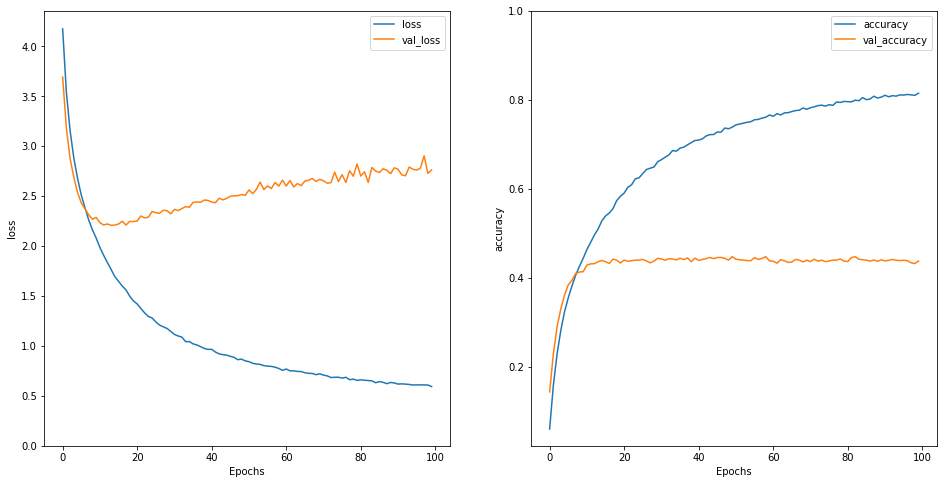

In [172]:
# Plot the training & validation accuracy

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])



plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 2)
plot_graphs(output, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 1)
plot_graphs(output, 'loss')
plt.ylim(0, None)

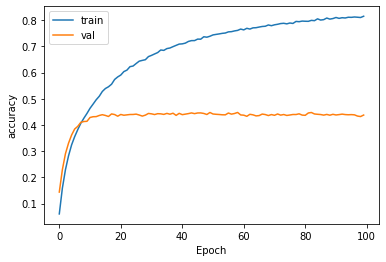

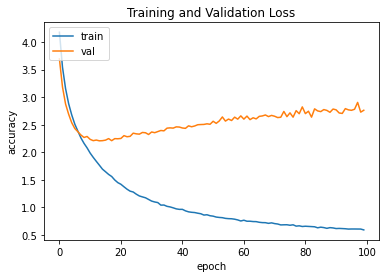

In [173]:
# Plot the training & validation loss
plt.plot(output.history['accuracy'])
plt.plot(output.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# Plot the training & validation loss
plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Testing/Evaluation

(05 points)

In this section, you will write code for the following:

*   Evaluate the trained DL model on the CIFAR-100 test dataset. Accuracy value should be printed. Please visit this [website](https://benchmarks.ai/cifar-100) for the benchmark performances of different techniques on the CIFAR-100 dataset.

In [174]:
# Evaluate the trained DL model on the CIFAR-100 test dataset
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=1)
print(test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 2.7082 - accuracy: 0.4476
0.44760000705718994


# Natural Language Processing - RNN

The goal of this task is to get hands-on experience in developing, training and testing **Recurrent Neural Network** for the Natural Language Processing task of Sentiment Analysis / Text Classification. In this part, you will work with the well-known **Reuters newswire classification dataset**. The dataset consists of newswires from Reuters, labeled over 46 topics. More information about the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/reuters-21578+text+categorization+collection) or [here](https://keras.io/api/datasets/reuters/). The Keras dataset is a cleaned and organized version of the original dataset and consists of 11,228 newswires (8982 training and 2246 testing). The goal is to classify a newswire into one of the 46 output catergories.


## Load/Prepare Data

(10 points + 10 extra credits)

In this section, you will write code for the following: 

*   (05 points) Load the Reuters dataset - use the Keras version
 *   Select the vocabulary size while loading the data
 *   The data will be loaded as integer representations for each word
*   (05 points) Prepare the data to be used for the next steps
 *   Each data entry (newswire) can be of different lengths
 *   Make each newswire consistent - same number of words
 *   'Pad' words (say 0) to get to the standard length or remove words
*   (10 points) Print randomly 5 complete reviews from the dataset
 *   Each review when loaded from Keras will just be a list of numbers
 *   Obtain the word_index which maps each number to an actual word
 *   Using this convert a random review which is just a list of numbers to a list of words
 *   Print 5 such random reviews from the entire dataset -- each from a different topic.
 *   Use this as reference - https://keras.io/api/datasets/imdb/#get_word_index-function

In [175]:
reuters_topics = ['cocoa','grain','veg-oil','earn','acq','wheat','copper','housing','money-supply',
 'coffee','sugar','trade','reserves','ship','cotton','carcass','crude','nat-gas',
 'cpi','money-fx','interest','gnp','meal-feed','alum','oilseed','gold','tin',
 'strategic-metal','livestock','retail','ipi','iron-steel','rubber','heat','jobs',
 'lei','bop','zinc','orange','pet-chem','dlr','gas','silver','wpi','hog','lead']

In [180]:
# Load the Reuters dataset - use the Keras version
#   Select the vocabulary size while loading the data
#   The data will be loaded as integer representations for each word

from keras.datasets import reuters

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=10000)   
assert(len(X_test)==len(y_test))
assert(len(X_train)==len(y_train)) 
print('training sample: {}'.format(len(y_train)))
print('Testing Samples: {}'.format(len(y_test)))
print('classes: ', np.max(y_train)+2-1)    


training sample: 8982
Testing Samples: 2246
classes:  46


In [177]:
# Prepare the data to be used for the next steps
#   Each data entry (newswire) can be of different lengths
#   Make each newswire consistent - same number of words
#   'Pad' words (say 0) to get to the standard length or remove words
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
num_words = 100
num_classes = 46

# Tokenization
tokenizer = Tokenizer(num_words=num_words)

X_train = tokenizer.sequences_to_matrix(X_train, mode='binary')
X_test = tokenizer.sequences_to_matrix(X_test, mode='binary')
print(f'Data in X_train: ', X_train[0])
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print(f'x_train.shape: {X_train.shape}')
print(f'x_test.shape: {X_test.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'y_test.shape: {y_test.shape}')

Data in X_train:  [0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0.
 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0.
 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
x_train.shape: (8982, 100)
x_test.shape: (2246, 100)
y_train.shape: (8982, 46)
y_test.shape: (2246, 46)


In [182]:
# Print randomly 5 complete reviews from the dataset
#   Each review when loaded from Keras will just be a list of numbers
#   Obtain the word_index which maps each number to an actual word
#   Using this convert a random review which is just a list of numbers to a list of words
#   Print 5 such random reviews from the entire dataset -- each from a different topic.
#   Use this as reference - https://keras.io/api/datasets/imdb/#get_word_index-function
word_index = reuters.get_word_index()
maxm_words = 101
word = {}
for key, value in word_index.items():
    word[value] = key

for i in range(6-1):
    the_review = ' '.join([word[x] for x in X_train[i]])
    print(f"{i}th review: ", the_review)
  

0th review:  the of of mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs
1th review:  the termination payment airport takes 6 of geological 3 6 602 begin up said fully bank expects commodity total is giant a of this takes of series termination payment airport mln a for capital 1 pre 50 american east said in council takes of of france a but u any 4 s 1st losses pct dlrs
2th review:  the lt dlrs demand 000 reuter dividend year lt plus billion 04 000 reuter dividend year an worth new vs reuter dlrs warburg on shrs earnings countries new vs reuter 1985 billion vs 2 lt 4 division 000 reuter from go 000 lt plus which mid 000 reuter from total 0

## RNN Model Creation

(25 points)

In this section, you will write code for the following:

*   (10 points) Create a DL model for Natural Language Processing - must have either of these layers - Recurrent Neural Network / LSTM / GRU. Print the DL model summary.
*   (15 points) Points will be deducted if the model overfits, i.e., the accuracy/loss curves (plotted in the next section) for training and validation must be very similar. Overfitting occurs if the training graph keeps improving and the validation graph stays constant or it degrades.

In [ ]:
# Create a DL model for Natural Language Processing - Recurrent Neural Network / LSTM / GRU
from keras import Sequential
from keras.layers import Embedding
from keras.layers import SimpleRNN
from keras.layers import Dense
max_features = 10000

model = Sequential([
    Embedding(max_features, 64),
    SimpleRNN(64, return_sequences=True),
    SimpleRNN(64, return_sequences=True),
    SimpleRNN(64, return_sequences=True),
    SimpleRNN(64),
    Dense(46, activation='softmax')
])

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Print the DL model summary
model.summary()

## Training

(10 points)

In this section, you will write code to do the following:

*   (05 points) Train/fit the DL model using the Reuters data
 *  Validation split should be 20%
*   (05 points) Plot two graphs
 *  Graph-1 will have two plots for accuracy - training accuracy and validation accuracy
 *  Graph-2 will have two plots for loss - training loss and validation loss


In [ ]:
# Train/fit the DL model using the training Reuters data
second = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.20)


In [ ]:
# Plot the training & validation accuracy
plt.plot(second.history['accuracy'])
plt.plot(second.history['val_accuracy'])
plt.title('Training / Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# Plot the training & validation loss
plt.plot(second.history['accuracy'])
plt.plot(second.history['val_accuracy'])
plt.title('Training and Validation Loss History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Testing/Evaluation

(05 points)

In this section, you will write code for the following:

*   Evaluate the trained DL model on the Reuters test dataset. Accuracy value should be printed.

In [ ]:
# Evaluate the trained DL model on the Reuters test dataset
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print(test_acc)

# Submission Instructions



1.   Complete all tasks above - **File MUST contain the output for ALL cells**
2.   Export this notebook as .ipynb
      (File > Download as ipynb)
3.   Upload the .ipynb file on Blackboard



## Rubric

*   Computer Vision - CNN
    *   (10 points) Load/Prepare Data
    *   (10 extra credits) Visualize Data
    *   (25 points) CNN Model Creation
    *   (10 points) Training
    *   (05 points) Testing/Evaluation
*   Natural Language Processing - RNN
    *   (10 points) Load/Prepare Data
    *   (10 extra credits) Visualize Data
    *   (25 points) RNN Model Creation
    *   (10 points) Training
    *   (05 points) Testing/Evaluation 

